# Lending club case study

Steps : 

- First load data and get shape
- Drop all coulmns with all value Nan or if column values are same like 0
- Drop columns like URL or cutomer behavior variables which may not have any impact
- Describe dataset
- Drop rows for Current as we are not interested in this :  we are interested in Fully paid and Charged off
- Create derived columns if required  
- Create plots to check for univariate and Bivariate analysis.

Notes: 
identify outliers using box plot.

imp variables: loan_amnt (asked amount by borrower) , funded_amnt (authorized some fund by market place : suggested amount by market place to lender), funded_amnt_inv (actual amount given by lender reaching to borrower),emp_len, check grade and subgrade.

check types of loan :  

conclusion : who may default based on factors?


## Data Understanding
Data set contains information about loans sanctioned to different people. It has info about the loan as well as some details about the borrower. Listing few important columns which will help for our analysis to find the driving variables behind loan default.

Details about loan:

- funded_amnt_inv: Loan amount which is sanctioned by investor and recieved by the borrower.
- int_rate: Interest rate at which loan is given.
- term: loan repayment tenure.
- grade: Loan grade.
- sub grade: Loan sub grade.
- loan_status: current status of the loan.

Details about borrower:

- home_ownership: Whether borrower owns a house or if he stays in rented house.
- annual_inc: Anual income of borrower as per his/her declaration.
- verification_status: Wether income source is verified or not.

In [43]:
## imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ws

In [44]:
ws.filterwarnings('ignore')
pd.options.display.max_columns=150


In [45]:
#load dataset and get shape
loan_data = pd.read_csv('loan/loan.csv')
loan_data.shape

(39717, 111)

## Data Cleaning

In [46]:
# drop columns with null values.
loan_data.dropna(how='all', axis=1, inplace=True)
loan_data.shape

(39717, 57)

drop columns with single values as it will not affect the exploratory analysis

In [47]:
for col in loan_data.columns:
    if len(loan_data[col].unique()) == 1:
        loan_data.drop(col,inplace=True,axis=1)
loan_data.shape

(39717, 51)

### drop customer behavior coulmns as suggested in Upgrad session

In [48]:
drop_col= ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']
loan_data.drop(drop_col, axis=1,inplace=True)
loan_data.shape

(39717, 31)

#### describe data

In [49]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,14035.000000,2786.000000,39661.0,39661.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,35.900962,69.698134,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,22.020060,43.822529,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,18.000000,22.000000,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,34.000000,90.000000,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,52.000000,104.000000,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,120.000000,129.000000,0.0,0.0,2.000000,0.0


In [50]:
# getting sample values
loan_data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,next_pymnt_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,NaN,NaN,NaN,0.0,0.0,0.0,0.0


#### remove rows where loan_status is current

In [51]:
loan_data.shape

(39717, 31)

In [52]:
loan_data = loan_data[loan_data['loan_status'] != 'Current']

loan_data.shape

(38577, 31)

drop duplicates

In [53]:
loan_data.drop_duplicates(keep='first', inplace=True)
loan_data.shape

(38577, 31)

#### Adding derived columns

In [54]:
loan_data['has_defaulted'] = loan_data['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
loan_data.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,next_pymnt_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens,has_defaulted
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1


Formating data

In [55]:
loan_data['int_rate'].replace('%', '', inplace=True, regex=True)
loan_data['int_rate'] =loan_data['int_rate'].astype('float64')
loan_data.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

### univariate analysis

In [56]:
list(loan_data.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'tax_liens',
 'has_defaulted']

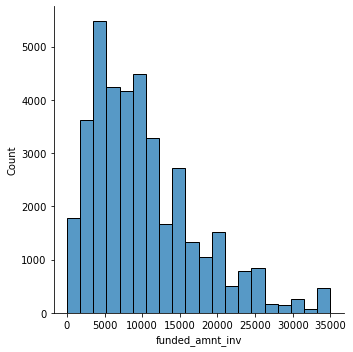

In [57]:
sns.displot(data=loan_data.funded_amnt_inv,bins=20)

<AxesSubplot:xlabel='loan_status'>

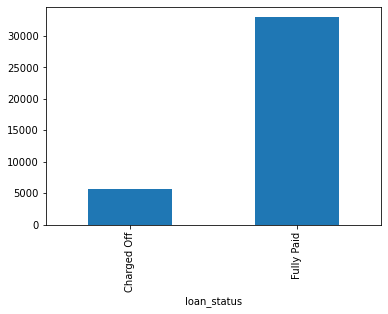

In [58]:
## checking bar plot for loan_status
loan_status_grp= loan_data.groupby('loan_status')['loan_status'].count()
loan_status_grp.plot.bar()

<AxesSubplot:xlabel='grade'>

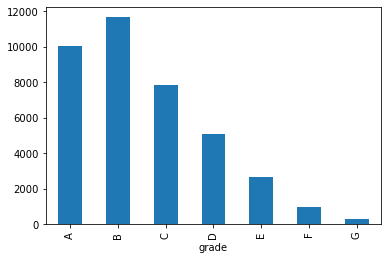

In [59]:
## checking bar plot for grade
grade_grp = loan_data.groupby('grade').grade.count()
grade_grp.plot.bar()

In [60]:
## checking bar plot for grade
income_grp = loan_data.groupby('annual_inc').annual_inc.count()
# income_grp.plot.bar()
# loan_data['annual_inc']

#### Bivariate Analysis

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt_inv'>

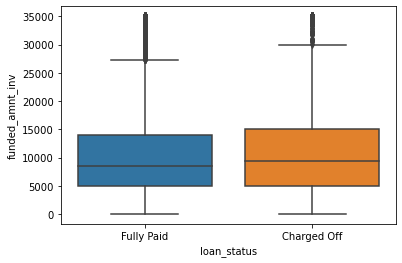

In [61]:
## finding outliers in box plot
sns.boxplot(x = 'loan_status', y = 'funded_amnt_inv', data = loan_data)

In [62]:
# let us first create a bucket for annual_income
def buckets(inc):
    if inc<=50000:
        return 'low'
    elif inc>50000 and inc<=90000:
        return 'medium'
    else:
        return 'high'            
loan_data['income_category'] = loan_data.annual_inc.apply(lambda x: buckets(x))

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

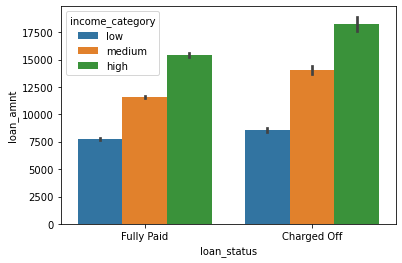

In [63]:
# Analysis on loan status, loan amount and income category
sns.barplot(x="loan_status", y="loan_amnt", hue="income_category", data=loan_data)

<AxesSubplot:xlabel='income_category', ylabel='has_defaulted'>

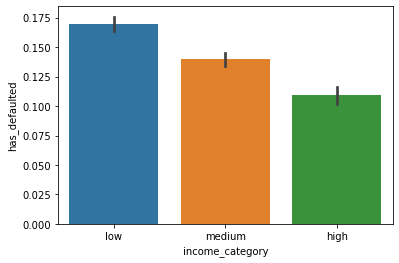

In [64]:
sns.barplot(x="income_category", y="has_defaulted",  data=loan_data)

In [65]:
print('Precentage of Defaulters in Every income Level')
print('High',round(loan_data[(loan_data['income_category']=='high')&(loan_data['loan_status']=='Charged Off')].shape[0]/loan_data[loan_data['income_category']=='high'].shape[0]*100,2))
print('Medium',round(loan_data[(loan_data['income_category']=='medium')&(loan_data['loan_status']=='Charged Off')].shape[0]/loan_data[loan_data['income_category']=='medium'].shape[0]*100,2))
print('Low',round(loan_data[(loan_data['income_category']=='low')&(loan_data['loan_status']=='Charged Off')].shape[0]/loan_data[loan_data['income_category']=='low'].shape[0]*100,2))


Precentage of Defaulters in Every income Level
High 10.93
Medium 13.98
Low 16.98


#### Observations:

- From above bar plots we can observe that the loan amount increases when borrower has high income level.
- The defaulters are present more in low income group.


#### Defaults variation interest rate:

In [66]:
# Generic function to show bar plot

def barplot(data, xcolumn,  ycolumn, bins=5,width=20,height=5,title=""):
    xrange = pd.cut(data[xcolumn], bins)
    df = pd.DataFrame({ xcolumn : xrange, ycolumn : data[ycolumn]})
    sns.barplot(y=df[ycolumn], x=df[xcolumn],).set(title=title)
    plt.figure(figsize=(width, height))
    plt.show()

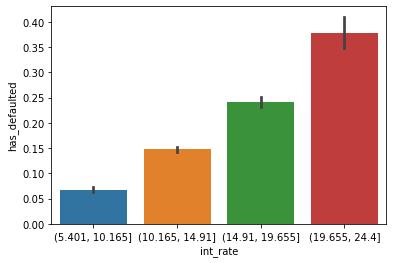

<Figure size 1440x360 with 0 Axes>

In [67]:
barplot(loan_data, xcolumn='int_rate',ycolumn='has_defaulted',bins=4)


#### Observations:

- From above bar plot we can observe that higher interest rate has high defaults.


#### Defaults check with long term vs short term

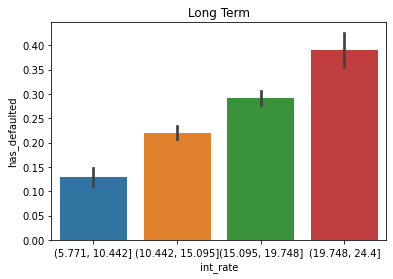

<Figure size 1440x360 with 0 Axes>

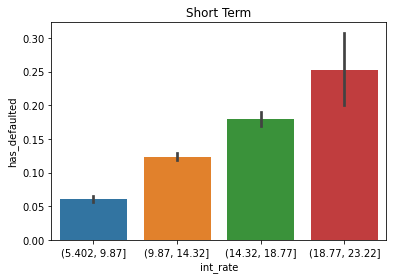

<Figure size 1440x360 with 0 Axes>

In [68]:
lt_loan = loan_data[loan_data.term ==' 60 months']
barplot(lt_loan, xcolumn='int_rate',ycolumn='has_defaulted',bins=4,title="Long Term")

st_loan = loan_data[loan_data.term ==' 36 months']
barplot(st_loan, xcolumn='int_rate',ycolumn='has_defaulted',bins=4,title="Short Term")

#### Observations:

- From above bar plot we can observe that long term loans has high defaults.

#### Bivariate analysis with Employment length

In [69]:
#loan_data['emp_length'].unique()

def elbuckets(length):
    if length in ['< 1 year','1 year', '2 years', '3 years']:
        return 'low'
    elif length in ['4 years', '5 years', '6 years','7 years']:
        return 'medium'
    else:
        return 'high'            
loan_data['emp_exp'] = loan_data['emp_length'].apply(lambda x: elbuckets(x))

pd.crosstab([loan_data['has_defaulted']], columns=loan_data['emp_exp']).style.background_gradient(axis=0)


emp_exp,high,low,medium
has_defaulted,,,
0,10262,13763,8925
1,1920,2217,1490


In [70]:

print('Precentage of Defaulters in Every emp_exp')
print('High',round(loan_data[(loan_data['emp_exp']=='high')&(loan_data['has_defaulted']==1)].shape[0]/loan_data[loan_data['emp_exp']=='high'].shape[0]*100,2))
print('Medium',round(loan_data[(loan_data['emp_exp']=='medium')&(loan_data['has_defaulted']==1)].shape[0]/loan_data[loan_data['emp_exp']=='medium'].shape[0]*100,2))
print('Low',round(loan_data[(loan_data['emp_exp']=='low')&(loan_data['has_defaulted']==1)].shape[0]/loan_data[loan_data['emp_exp']=='low'].shape[0]*100,2))


Precentage of Defaulters in Every emp_exp
High 15.76
Medium 14.31
Low 13.87


##### Observation: There is not much diffenrce in percentage of loan defaulters with respect to Employment length.

#### Analysis with grade, loan status and income category 

In [71]:
# Analysis based on grade and income category
# In each grade of loan getting the count of loans which are fully paid and charged off based on the income level.
pd.crosstab([loan_data['grade'],loan_data['loan_status']], columns=loan_data['income_category']).style.background_gradient(axis=0)


<AxesSubplot:xlabel='grade', ylabel='has_defaulted'>

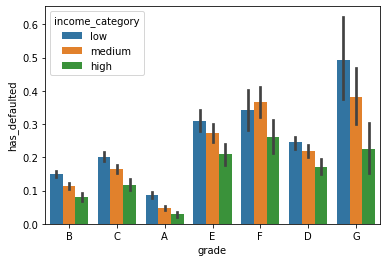

In [72]:
sns.barplot(x="grade", y="has_defaulted", hue="income_category", data=loan_data)

### Observations

- The number of loans granted in each grade decreases as we go from grade A to G
- In loans with different grades, loan with G grade have defaulted the most.

## Analysis on home_ownership


In [73]:
pd.crosstab([loan_data['loan_status']], columns=loan_data['home_ownership']).style.background_gradient(axis=0)

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,
Charged Off,2327,0,18,443,2839
Fully Paid,14694,3,80,2532,15641


<AxesSubplot:xlabel='home_ownership', ylabel='has_defaulted'>

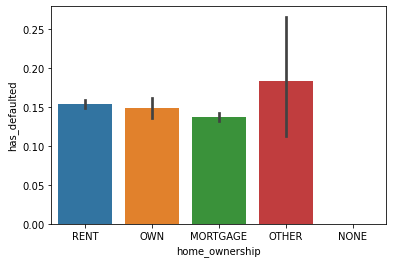

In [74]:
sns.barplot(y="has_defaulted", x="home_ownership", data=loan_data)

### Analysis of purpose with defaults

<AxesSubplot:xlabel='has_defaulted', ylabel='purpose'>

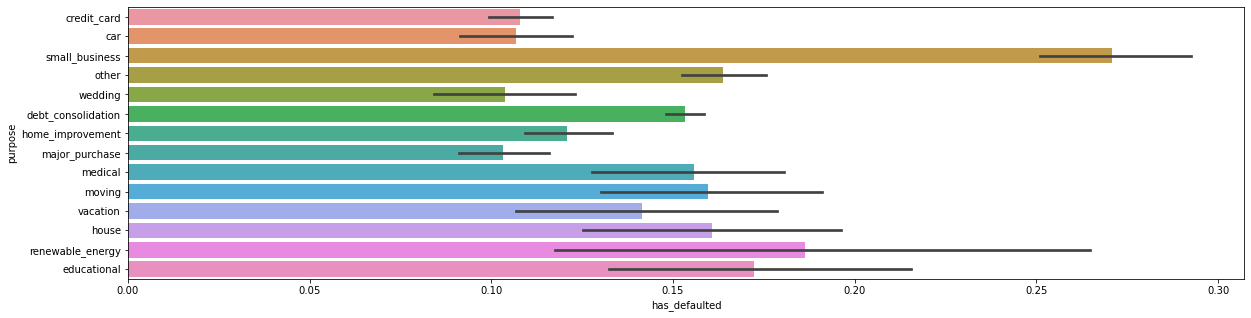

In [75]:
plt.figure(figsize=(20, 5))
sns.barplot(x="has_defaulted", y="purpose", data=loan_data)

### Observation: 
- Borrowers with purpose 'small_business' have highest rate for defaults.

### Analysis of pub_rec_bankruptcies with defaults

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='has_defaulted'>

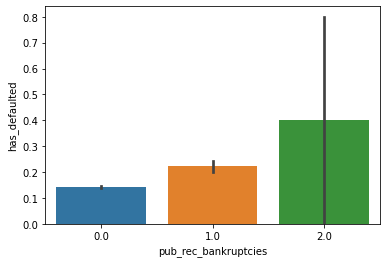

In [76]:
sns.barplot(data=loan_data, x='pub_rec_bankruptcies', y='has_defaulted')

#### Observations
-  Borrowers, who went bankrupt earlier, will most probably default.

##### Summary of All the Observations


* **Annual income**
    - loan amount increases when borrower has high income level.
    - low income group borrower are less likely to pay the loan.

* **Interest rate**: Higher interest rate has led to high defaults.
* **Term of loan**: Long term loans has high defaults.
* **Grade Analysis**: Providing loan to a borrower with credit grade G could be risky as loan with G grade have defaulted the most.
* **Purpose of loan** : Borrowers with purpose 'small_business' have highest rate for defaults
* **Earlier Bankrupt Borrowers** :  Borrowers, who went bankrupt earlier, will most probably default.





